In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
Y_test = Y_test.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (14,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

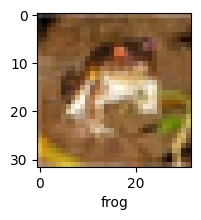

In [7]:
plot_sample(X_train, Y_train, 0)

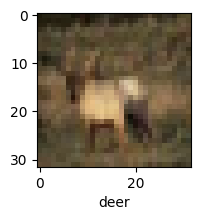

In [8]:
plot_sample(X_train, Y_train, 3)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
ANN.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
ANN.fit(X_train, Y_train, epochs=11)

Epoch 1/11
1563/1563 [==============================] - 83s 52ms/step - loss: 1.8161 - accuracy: 0.3513
Epoch 2/11
1563/1563 [==============================] - 84s 54ms/step - loss: 1.6268 - accuracy: 0.4254
Epoch 3/11
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5449 - accuracy: 0.4555
Epoch 4/11
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4834 - accuracy: 0.4770
Epoch 5/11
1563/1563 [==============================] - 85s 55ms/step - loss: 1.4333 - accuracy: 0.4949
Epoch 6/11
1563/1563 [==============================] - 85s 55ms/step - loss: 1.3936 - accuracy: 0.5093
Epoch 7/11
1563/1563 [==============================] - 86s 55ms/step - loss: 1.3529 - accuracy: 0.5256
Epoch 8/11
1563/1563 [==============================] - 87s 56ms/step - loss: 1.3180 - accuracy: 0.5381
Epoch 9/11
1563/1563 [==============================] - 90s 57ms/step - loss: 1.2874 - accuracy: 0.5483
Epoch 10/11
1563/1563 [==============================] - 90s 58m

In [13]:
ANN.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.3868 - accuracy: 0.5097


[1.3867768049240112, 0.5097000002861023]

In [14]:
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
CNN.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
batch_size = 32
history = CNN.fit(X_train, Y_train, epochs=11, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/11
1563/1563 [==============================] - 39s 24ms/step - loss: 1.4505 - accuracy: 0.4792 - val_loss: 1.1960 - val_accuracy: 0.5778
Epoch 2/11
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1001 - accuracy: 0.6161 - val_loss: 1.0284 - val_accuracy: 0.6441
Epoch 3/11
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9701 - accuracy: 0.6621 - val_loss: 0.9918 - val_accuracy: 0.6553
Epoch 4/11
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8834 - accuracy: 0.6916 - val_loss: 0.9188 - val_accuracy: 0.6841
Epoch 5/11
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8082 - accuracy: 0.7187 - val_loss: 0.9033 - val_accuracy: 0.6934
Epoch 6/11
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7508 - accuracy: 0.7390 - val_loss: 0.9184 - val_accuracy: 0.6878
Epoch 7/11
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6954 - accuracy: 0.7588 - val_loss: 0.9355 -

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
CNN.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9305 - accuracy: 0.7160


[0.9304771423339844, 0.7160000205039978]

In [19]:
Y_pred = CNN.predict(X_test)
Y_pred[:5]
predicted_classes = np.argmax(Y_pred, axis=1)
print(predicted_classes)

313/313 [==============================] - 2s 6ms/step
[3 8 8 ... 5 4 7]


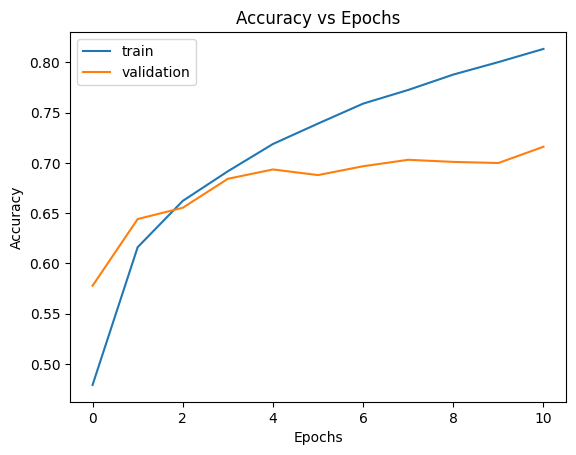

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

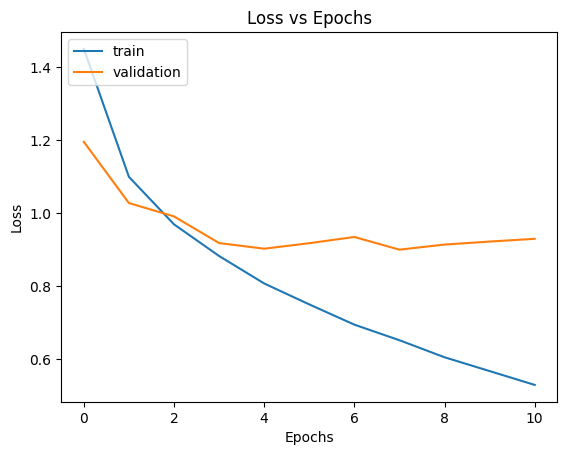

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32,32,3), activation ="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32,32,3), activation ="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32,32,3), activation ="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(80, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [23]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 3:
        lrate = 0.0005
    if epoch > 7:
        lrate = 0.0003
    return lrate

In [24]:
lr_callback = LearningRateScheduler(lr_schedule)
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
cnn.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = cnn.fit(X_train, Y_train, epochs=11, validation_data=(X_test, Y_test), callbacks=[lr_callback])

Epoch 1/11
1563/1563 [==============================] - 49s 31ms/step - loss: 1.7272 - accuracy: 0.3587 - val_loss: 1.3793 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 2/11
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4040 - accuracy: 0.4933 - val_loss: 1.2272 - val_accuracy: 0.5613 - lr: 0.0010
Epoch 3/11
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2863 - accuracy: 0.5407 - val_loss: 1.1390 - val_accuracy: 0.5955 - lr: 0.0010
Epoch 4/11
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2226 - accuracy: 0.5696 - val_loss: 1.0785 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 5/11
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1303 - accuracy: 0.6001 - val_loss: 0.9689 - val_accuracy: 0.6574 - lr: 5.0000e-04
Epoch 6/11
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0977 - accuracy: 0.6123 - val_loss: 0.9490 - val_accuracy: 0.6667 - lr: 5.0000e-04
Epoch 7/11
1563/1563 [================

In [26]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9171 - accuracy: 0.6800


[0.9170928001403809, 0.6800000071525574]

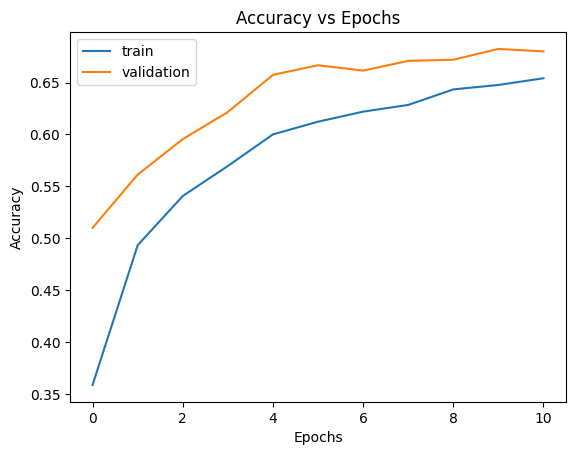

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

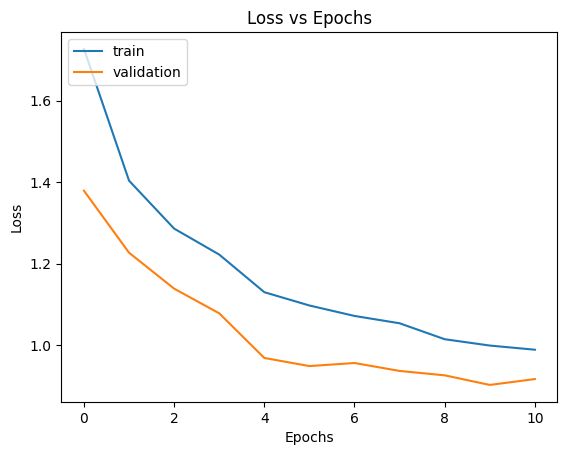

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
learning_rates = [lr_schedule(epoch) for epoch in range(1, 12)]  
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

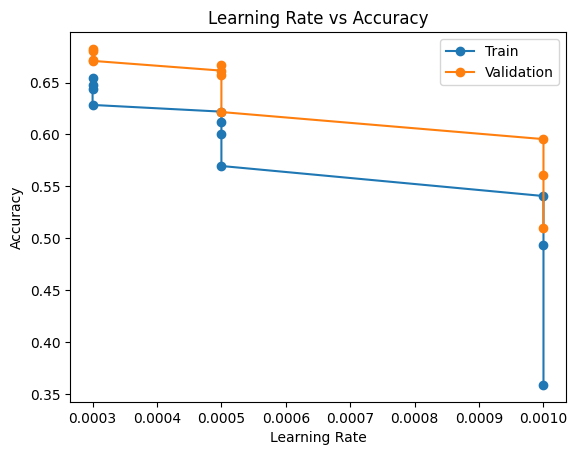

In [30]:
plt.plot(learning_rates, train_accuracies, marker='o', label='Train')
plt.plot(learning_rates, val_accuracies, marker='o', label='Validation')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy')
plt.legend()
plt.show()

In [31]:
learning_rates = [lr_schedule(epoch) for epoch in range(1, 12)]  
train_loss = history.history['loss']
val_loss = history.history['val_loss']

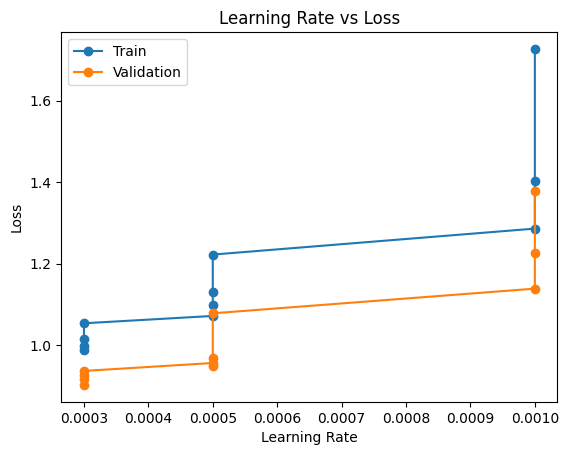

In [32]:
plt.plot(learning_rates, train_loss, marker='o', label='Train')
plt.plot(learning_rates, val_loss, marker='o', label='Validation')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.legend()
plt.show()

In [33]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [34]:
Y_pred = cnn.predict(X_test)
Y_prediction_classes = [np.argmax(element) for element in Y_pred]
print("Classification Report: \n", classification_report(Y_test, Y_prediction_classes, target_names=classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

    airplane       0.79      0.70      0.74      1000
  automobile       0.82      0.87      0.85      1000
        bird       0.62      0.49      0.55      1000
         cat       0.49      0.46      0.47      1000
        deer       0.62      0.57      0.60      1000
         dog       0.65      0.53      0.58      1000
        frog       0.49      0.93      0.64      1000
       horse       0.84      0.67      0.75      1000
        ship       0.79      0.85      0.82      1000
       truck       0.88      0.73      0.80      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [35]:
cnn2 = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3, 3),input_shape = (32,32,3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters = 32, kernel_size=(3, 3), input_shape = (32,32,3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32,32,3), activation = 'relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32,32,3), activation = 'relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32,32,3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32,32,3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation = 'softmax')
])

In [36]:
cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [37]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
cnn2.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
lr_callback = LearningRateScheduler(lr_schedule)
history2 = cnn2.fit(X_train, Y_train, epochs=11, validation_data=(X_test, Y_test), callbacks=[lr_callback])

Epoch 1/11
1563/1563 [==============================] - 340s 216ms/step - loss: 1.3034 - accuracy: 0.5515 - val_loss: 0.9598 - val_accuracy: 0.6651 - lr: 0.0010
Epoch 2/11
1563/1563 [==============================] - 356s 228ms/step - loss: 0.8415 - accuracy: 0.7086 - val_loss: 0.7938 - val_accuracy: 0.7252 - lr: 0.0010
Epoch 3/11
1563/1563 [==============================] - 361s 231ms/step - loss: 0.6904 - accuracy: 0.7652 - val_loss: 0.8334 - val_accuracy: 0.7245 - lr: 0.0010
Epoch 4/11
1563/1563 [==============================] - 364s 233ms/step - loss: 0.5816 - accuracy: 0.8000 - val_loss: 0.6957 - val_accuracy: 0.7683 - lr: 0.0010
Epoch 5/11
1563/1563 [==============================] - 367s 235ms/step - loss: 0.3771 - accuracy: 0.8677 - val_loss: 0.5550 - val_accuracy: 0.8255 - lr: 5.0000e-04
Epoch 6/11
1563/1563 [==============================] - 369s 236ms/step - loss: 0.2957 - accuracy: 0.8971 - val_loss: 0.5734 - val_accuracy: 0.8231 - lr: 5.0000e-04
Epoch 7/11
1563/1563 [====

In [39]:
cnn2.evaluate(X_test, Y_test)

313/313 [==============================] - 17s 53ms/step - loss: 0.6608 - accuracy: 0.8451


[0.6607888340950012, 0.8450999855995178]

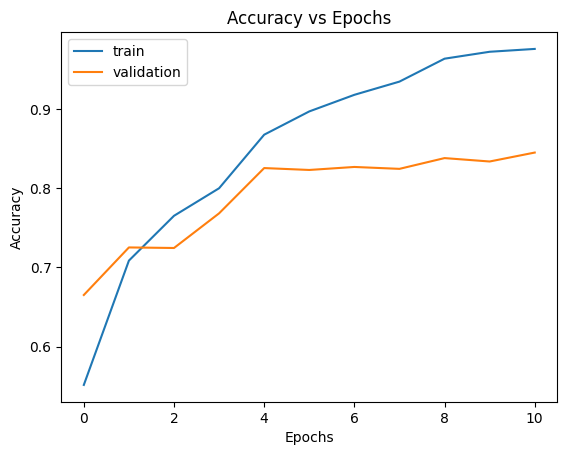

In [40]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

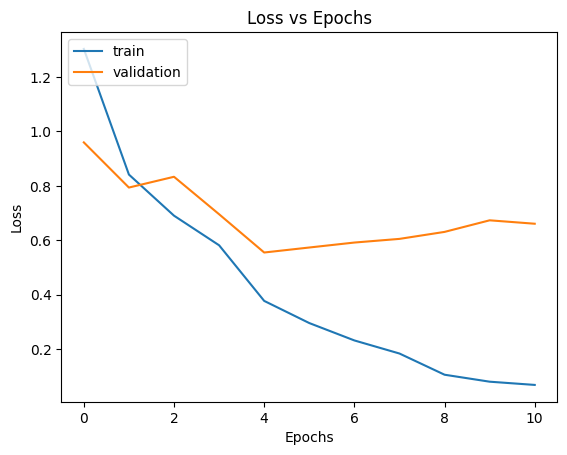

In [41]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
learning_rates2 = [lr_schedule(epoch) for epoch in range(1, 12)]  
train_accuracies2 = history2.history['accuracy']
val_accuracies2 = history2.history['val_accuracy']

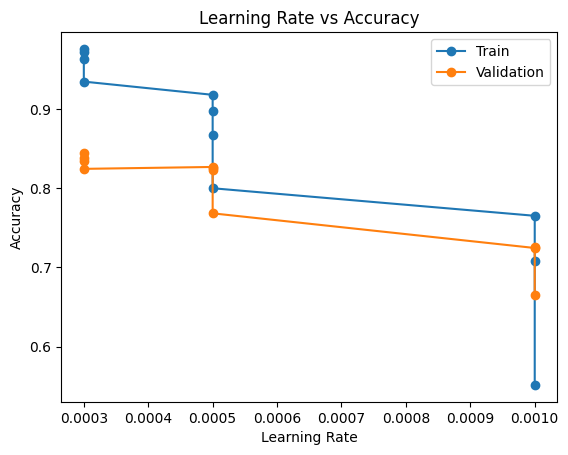

In [43]:
plt.plot(learning_rates2, train_accuracies2, marker='o', label='Train')
plt.plot(learning_rates2, val_accuracies2, marker='o', label='Validation')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy')
plt.legend()
plt.show()

In [44]:
learning_rates3= [lr_schedule(epoch) for epoch in range(1, 12)]  
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

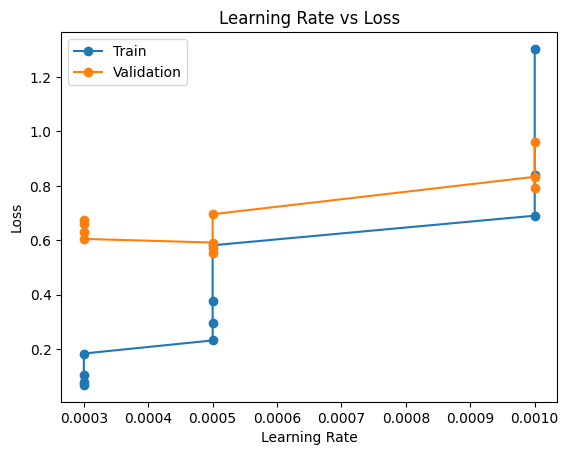

In [45]:
plt.plot(learning_rates3, train_loss2, marker='o', label='Train')
plt.plot(learning_rates3, val_loss2, marker='o', label='Validation')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.legend()
plt.show()

In [46]:
Y_pred = cnn2.predict(X_test)
Y_prediction_classes = [np.argmax(element) for element in Y_pred]
print("Classification Report: \n", classification_report(Y_test, Y_prediction_classes, target_names=classes))

313/313 [==============================] - 16s 50ms/step
Classification Report: 
               precision    recall  f1-score   support

    airplane       0.86      0.86      0.86      1000
  automobile       0.92      0.93      0.93      1000
        bird       0.77      0.79      0.78      1000
         cat       0.72      0.69      0.71      1000
        deer       0.81      0.83      0.82      1000
         dog       0.81      0.74      0.77      1000
        frog       0.85      0.90      0.87      1000
       horse       0.89      0.87      0.88      1000
        ship       0.91      0.92      0.91      1000
       truck       0.89      0.91      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



In [28]:
pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached pandas-2.1.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata (18 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
Using cached pandas-2.1.3-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import seaborn as sns

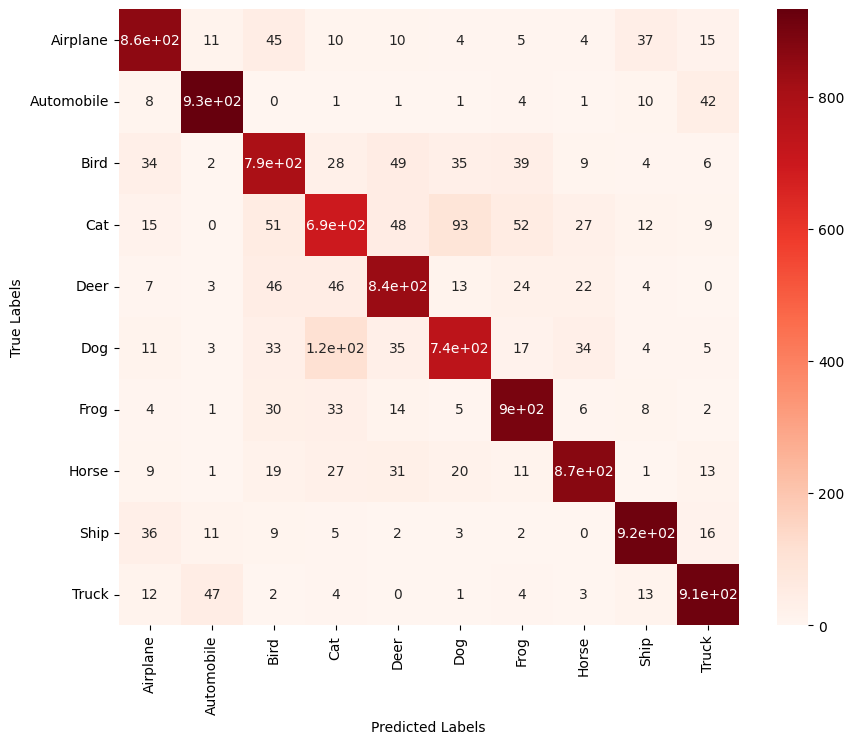

In [49]:
confusion_matrix = tf.math.confusion_matrix(Y_test, Y_prediction_classes)
class_labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Reds',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()